In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [2]:
df = pd.read_csv('/Users/mihirnevpurkar/Documents/Python/new_clean_airbnb.csv')
df.head()



,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,THE VILLAGE OF HARLEM....NEW YORK !,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,620,124,3.0,0.0,00-00-00,0.00,5.0,1.0,352.0
2,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204,41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
3,Large Furnished Room Near B'way,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,True,strict,Private room,2005.0,1018,204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0
4,Cute & Cozy Lower East Side 1 bdrm,verified,Miranda,Manhattan,Chinatown,40.71344,-73.99037,False,flexible,Entire home/apt,2004.0,319,64,1.0,160.0,6/9/2019,1.33,3.0,4.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82980 entries, 0 to 82979
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME                            82980 non-null  object 
 1   host_identity_verified          82980 non-null  object 
 2   host name                       82980 non-null  object 
 3   neighbourhood group             82980 non-null  object 
 4   neighbourhood                   82980 non-null  object 
 5   lat                             82980 non-null  float64
 6   long                            82980 non-null  float64
 7   instant_bookable                82980 non-null  bool   
 8   cancellation_policy             82980 non-null  object 
 9   room type                       82980 non-null  object 
 10  Construction year               82980 non-null  float64
 11  price                           82980 non-null  int64  
 12  service fee                     

In [5]:
from pandas import Series,DataFrame
df['neighbourhood group'] = df['neighbourhood group'].replace(0,'null')
neighbourhood_group = DataFrame({'neighbourhood group':df['neighbourhood group'].unique()})
code = encoder.fit_transform(neighbourhood_group['neighbourhood group'])
neighbourhood_group['Code'] = code
neighbourhood_group

,neighbourhood group,Code
0,Brooklyn,1
1,Manhattan,2
2,brookln,5
3,Bronx,0
4,Queens,3
5,Staten Island,4


In [7]:
#lets encode neighbourhood

neighbourhood = DataFrame({'neighbourhood':df['neighbourhood'].unique()})
neigh_code = encoder.fit_transform(neighbourhood['neighbourhood'])
neighbourhood['Code'] = neigh_code               
neighbourhood

,neighbourhood,Code
0,Kensington,111
1,Harlem,97
2,East Harlem,62
3,Hell's Kitchen,98
4,Chinatown,36
...,...,...
220,Willowbrook,219
221,Todt Hill,196
222,Glen Oaks,86
223,Gerritsen Beach,85


In [10]:
## lets clean room type

room_type = DataFrame({'room type':df['room type'].unique()})
room_code = encoder.fit_transform(room_type['room type'])
room_type['Code'] = room_code
room_type

,room type,Code
0,Private room,2
1,Entire home/apt,0
2,Shared room,3
3,Hotel room,1


In [13]:
## lets clean instant_bookable

instant_bookable_type = DataFrame({'instant_bookable':df['instant_bookable'].unique()})
instant_bookable = encoder.fit_transform(instant_bookable_type['instant_bookable'])
instant_bookable_type['Code'] = instant_bookable
instant_bookable_type

,instant_bookable,Code
0,False,0
1,True,1


In [14]:
## lets clean cancellation_policy

cancellation_policy_type = DataFrame({'cancellation_policy':df['cancellation_policy'].unique()})
cancellation_policy = encoder.fit_transform(cancellation_policy_type['cancellation_policy'])
cancellation_policy_type['Code'] = cancellation_policy
cancellation_policy_type

,cancellation_policy,Code
0,strict,2
1,flexible,0
2,moderate,1


In [11]:
### lets encode 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82980 entries, 0 to 82979
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME                            82980 non-null  object 
 1   host_identity_verified          82980 non-null  object 
 2   host name                       82980 non-null  object 
 3   neighbourhood group             82980 non-null  object 
 4   neighbourhood                   82980 non-null  object 
 5   lat                             82980 non-null  float64
 6   long                            82980 non-null  float64
 7   instant_bookable                82980 non-null  bool   
 8   cancellation_policy             82980 non-null  object 
 9   room type                       82980 non-null  object 
 10  Construction year               82980 non-null  float64
 11  price                           82980 non-null  int64  
 12  service fee                     

In [18]:
df['neighbourhood_group'] = encoder.fit_transform(df['neighbourhood group'])
df['neighbourhood'] = encoder.fit_transform(df['neighbourhood'])
df['room_type'] = encoder.fit_transform(df['room type'])
df['instant_bookable_type'] = encoder.fit_transform(df['instant_bookable'])
df['cancellation_policy_type'] = encoder.fit_transform(df['cancellation_policy'])



In [20]:
df.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,...,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,neighbourhood_group,room_type,instant_bookable_type,cancellation_policy_type
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,111,40.64749,-73.97237,False,strict,Private room,...,9.0,10/19/2021,0.21,4.0,6.0,286.0,1,2,0,2
1,THE VILLAGE OF HARLEM....NEW YORK !,unconfirmed,Elise,Manhattan,97,40.80902,-73.94190,True,flexible,Private room,...,0.0,00-00-00,0.00,5.0,1.0,352.0,2,2,1,0
2,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,62,40.79851,-73.94399,False,moderate,Entire home/apt,...,9.0,11/19/2018,0.10,3.0,1.0,289.0,2,0,0,1
3,Large Furnished Room Near B'way,verified,Evelyn,Manhattan,98,40.76489,-73.98493,True,strict,Private room,...,430.0,6/24/2019,3.47,3.0,1.0,180.0,2,2,1,2
4,Cute & Cozy Lower East Side 1 bdrm,verified,Miranda,Manhattan,36,40.71344,-73.99037,False,flexible,Entire home/apt,...,160.0,6/9/2019,1.33,3.0,4.0,1.0,2,0,0,0


In [22]:
df.drop("NAME", axis=1, inplace=True)
df.drop("neighbourhood group", axis=1, inplace=True)
df.drop("neighbourhood", axis=1, inplace=True)
df.drop("cancellation_policy", axis=1, inplace=True)


In [24]:
df.drop("host name", axis=1, inplace=True)


In [26]:
df.drop("room type", axis=1, inplace=True)


In [28]:
df.drop("last review", axis=1, inplace=True)
df.drop("host_identity_verified", axis=1, inplace=True)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82980 entries, 0 to 82979
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lat                             82980 non-null  float64
 1   long                            82980 non-null  float64
 2   instant_bookable                82980 non-null  bool   
 3   Construction year               82980 non-null  float64
 4   price                           82980 non-null  int64  
 5   service fee                     82980 non-null  int64  
 6   minimum nights                  82980 non-null  float64
 7   number of reviews               82980 non-null  float64
 8   reviews per month               82980 non-null  float64
 9   review rate number              82980 non-null  float64
 10  calculated host listings count  82980 non-null  float64
 11  availability 365                82980 non-null  float64
 12  neighbourhood_group             

In [33]:
###Lets save cleaned data

df.to_csv('classification_airbnb.csv', encoding='utf-8', index=False)



In [34]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['lat','long','instant_bookable','Construction year','service fee','minimum nights','number of reviews','reviews per month','review rate number','calculated host listings count','availability 365','neighbourhood_group','room_type','instant_bookable_type','cancellation_policy_type']]
Y = df["price"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)


In [35]:
from sklearn.metrics import mean_squared_error

liner_model = LinearRegression()
liner_model.fit(x_train, y_train)

predicted_price = liner_model.predict(x_test)

MSE = mean_squared_error(predicted_price, y_test)
print(MSE)



1.9894325596745306


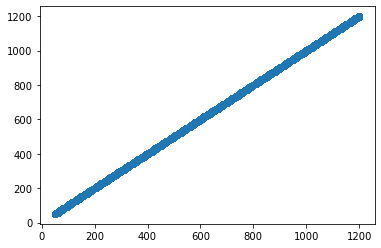

In [39]:
## MSE is almost equivalent to zero, lets try to visualize the MSE
import matplotlib.pyplot as plt
plt.scatter(np.array(predicted_price), np.array(y_test))
plt.show()

In [41]:
y_pred = pd.Series(predicted_price)
y_test = y_test.reset_index(drop=True)

In [43]:
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,144,144.983442
1,277,275.010795
2,311,310.001516
3,456,455.023708
4,428,429.994399
